In [5]:
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [6]:
from data.code.track_1_kp_matching import load_kpm_data
from utils import get_data_path

In [7]:
gold_data_dir = Path(get_data_path(), 'kpm_data')

In [8]:
arg_df, kp_df, labels_df = load_kpm_data(gold_data_dir, subset="train")


ֿ** loading task data:
	(-1, 'Assisted suicide should be a criminal offence'): loaded 121 arguments and 4 key points
	(-1, 'Homeschooling should be banned'): loaded 129 arguments and 6 key points
	(-1, 'The vow of celibacy should be abandoned'): loaded 112 arguments and 6 key points
	(-1, 'We should abandon marriage'): loaded 111 arguments and 5 key points
	(-1, 'We should abolish capital punishment'): loaded 110 arguments and 5 key points
	(-1, 'We should abolish intellectual property rights'): loaded 123 arguments and 4 key points
	(-1, 'We should adopt atheism'): loaded 123 arguments and 3 key points
	(-1, 'We should adopt libertarianism'): loaded 113 arguments and 5 key points
	(-1, 'We should ban human cloning'): loaded 123 arguments and 5 key points
	(-1, 'We should ban private military companies'): loaded 106 arguments and 4 key points
	(-1, 'We should ban the use of child actors'): loaded 121 arguments and 5 key points
	(-1, 'We should close Guantanamo Bay detention camp'): lo

## Arguments training data

In [9]:
arg_df

,arg_id,argument,topic,stance
0,arg_0_0,`people reach their limit when it comes to the...,Assisted suicide should be a criminal offence,-1
1,arg_0_1,A patient should be able to decide when they h...,Assisted suicide should be a criminal offence,-1
2,arg_0_2,a person has the right to end their suffering ...,Assisted suicide should be a criminal offence,-1
3,arg_0_3,a person should have the dignity to choose how...,Assisted suicide should be a criminal offence,-1
4,arg_0_4,a person should have the right to be able to c...,Assisted suicide should be a criminal offence,-1
...,...,...,...,...
5578,arg_27_218,we should subsidize vocational education to en...,We should subsidize vocational education,1
5579,arg_27_219,We should subsidize vocational education to su...,We should subsidize vocational education,1
5580,arg_27_220,While many who graduate from universities stru...,We should subsidize vocational education,1
5581,arg_27_221,with the rising cost of college tuition vocati...,We should subsidize vocational education,1


In [20]:
f"The number of topics: {len(set(arg_df.topic))}"

'The number of topics: 24'

In [39]:
f"The number of arguments: {len(set(arg_df.argument))}"

'The number of arguments: 5583'

In [23]:
f"Have duplicated argument: {len(set(arg_df.argument)) != len(arg_df)}"

'Have duplicated argument: False'

In [32]:
counter = Counter(arg_df['stance'])
counter

Counter({-1: 2700, 1: 2883})

In [19]:
pos_ratios = []
for topic in set(arg_df.topic):
    _stance = kp_df[kp_df.topic == topic].stance
    _counter = Counter(_stance)
    _counter_sorted = sorted(_counter.items())
    pos_ratios.append(_counter_sorted[1][1]/_counter_sorted[0][1])

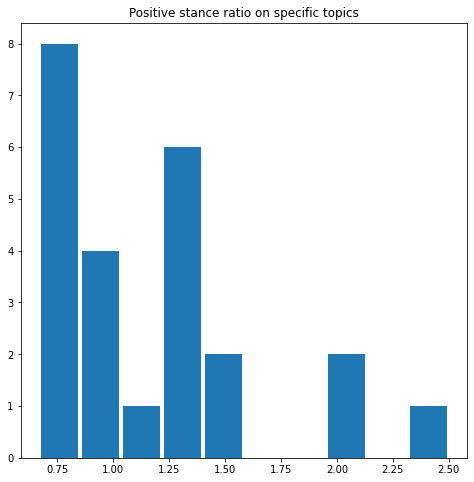

In [24]:
fig = plt.figure(figsize=(8,8))
plt.hist(pos_ratios, rwidth=0.9)
plt.title("Positive stance ratio on specific topics")
plt.show()

## Key points training data

In [25]:
kp_df

,key_point_id,key_point,topic,stance
0,kp_0_0,Assisted suicide gives dignity to the person t...,Assisted suicide should be a criminal offence,-1
1,kp_0_1,Assisted suicide reduces suffering,Assisted suicide should be a criminal offence,-1
2,kp_0_2,People should have the freedom to choose to en...,Assisted suicide should be a criminal offence,-1
3,kp_0_3,The terminally ill would benefit from assisted...,Assisted suicide should be a criminal offence,-1
4,kp_0_4,Assisted suicide allows people to solicit some...,Assisted suicide should be a criminal offence,1
...,...,...,...,...
202,kp_27_3,subsidizing vocational education is expensive,We should subsidize vocational education,-1
203,kp_27_4,subsidizing vocational education promotes thos...,We should subsidize vocational education,1
204,kp_27_5,vocational education is a good career choice,We should subsidize vocational education,1
205,kp_27_6,vocational education better fits many students,We should subsidize vocational education,1


In [43]:
f"arg_df and kp_df have the same number of topics: {len(set(kp_df.topic)) == len(set(arg_df.topic))}"

'arg_df and kp_df have the same number of topics: True'

In [46]:
f"Have duplicated key point: {len(set(kp_df.key_point)) != len(kp_df.key_point)}"

'Have duplicated key point: False'

In [48]:
counter = Counter(kp_df['stance'])
counter

Counter({-1: 99, 1: 108})

In [26]:
pos_ratios = []
for topic in set(kp_df.topic):
    _stance = kp_df[kp_df.topic == topic].stance
    _counter = Counter(_stance)
    _counter_sorted = sorted(_counter.items())
    pos_ratios.append(_counter_sorted[1][1]/_counter_sorted[0][1])

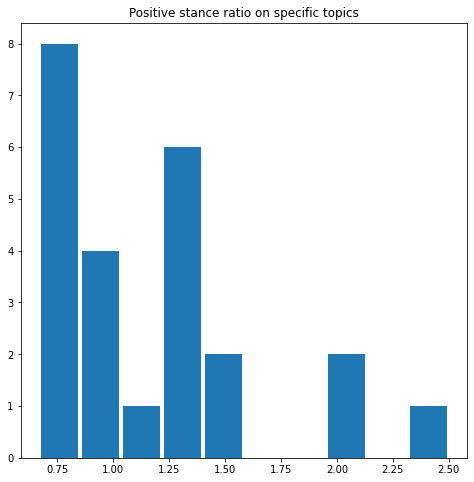

In [27]:
fig = plt.figure(figsize=(8,8))
plt.hist(pos_ratios, rwidth=0.9)
plt.title("Positive stance ratio on specific topics")
plt.show()

## Length

In [33]:
argu_length = []
for argu in set(arg_df.argument):
    _len = len(argu.split(' '))
    argu_length.append(_len)

In [37]:
topic_length = []
for topic in set(arg_df.topic):
    _len = len(topic.split(' '))
    topic_length.append(_len)

In [38]:
kp_length = []
for kp in set(kp_df.key_point):
    _len = len(kp.split(' '))
    kp_length.append(_len)

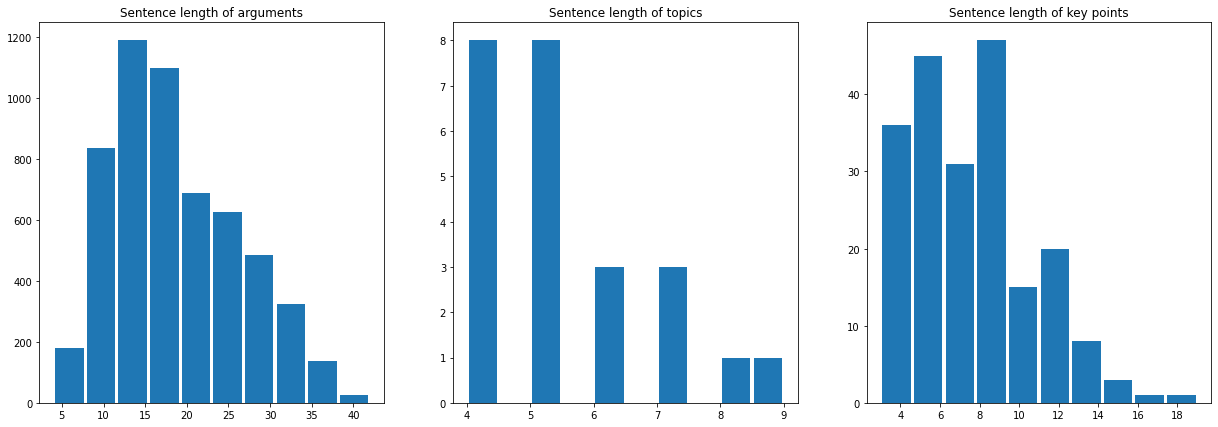

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(21,7))
axs.ravel()

axs[0].hist(argu_length, rwidth=0.9)
axs[0].set_title("Sentence length of arguments")

axs[1].hist(topic_length, rwidth=0.9)
axs[1].set_title("Sentence length of topics")

axs[2].hist(kp_length, rwidth=0.9)
axs[2].set_title("Sentence length of key points")

plt.show()